# Neu 350 spring 2021
## Week 6: loading and analyzing data from the Libet Experiment

Written by Jess Breda & Anthony Ambrosini

In [1]:
import os
import pandas as pd
from scipy.io import wavfile
import numpy as np
from libet_utils import *
import pickle as pkl
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

## load and process raw data

In [4]:
## load the raw data, process, and save as pkl file

## use your own file prefix and initials!

load_libet(file_prefix='libet_output0', student_initials='JRB')

Your experiment data has been saved! 
Check this directory for a .pkl file to submit


## load formatted data

In [5]:
## use the correct filename below. 
## (files downloaded from google will be a bit different.)

with open('libet_JRB.pkl', 'rb') as fh:
    loaded_libet = pkl.load(fh)

In [6]:
## what's inside?

print(loaded_libet.keys())

## for more information about those keys if they're not intuitive, look at the docstrings below:

dict_keys(['student', 'sample_rate', 'p1_wavs', 'p1_stop_idx', 'p1_mean_wav', 'p1_std_wav', 'p2_wavs', 'p2_urge_idx', 'p2_stop_idxs', 'p2_mean_wav', 'p2_std_wav'])


In [ ]:
load_libet?

In [ ]:
get_p1_data?

In [ ]:
get_p2_data?

## initial plots to visualize data

In [8]:
## set timeseries for each protocol
## (you can just run this cell as-is)

index_zero_p1 = loaded_libet['p1_stop_idx'] # p1 time zero  is at stop
t_end_p1 = (len(loaded_libet['p1_mean_wav']) - index_zero_p1) / loaded_libet['sample_rate']
t_start_p1 = (0 - index_zero_p1) / loaded_libet['sample_rate']
times_p1 = np.linspace(t_start_p1, t_end_p1, num=len(loaded_libet['p1_mean_wav']))

index_zero_p2 = loaded_libet['p2_urge_idx'] # p2 time zero is at urge 
t_end_p2 = (len(loaded_libet['p2_mean_wav']) - index_zero_p2) / loaded_libet['sample_rate']
t_start_p2 = (0 - index_zero_p2) / loaded_libet['sample_rate']
times_p2 = np.linspace(t_start_p2, t_end_p2, num=len(loaded_libet['p2_mean_wav']))

print(f"mapped {len(loaded_libet['p2_mean_wav'])} samples at {loaded_libet['sample_rate']} Hz to range {t_start_p2}:{t_end_p2} seconds")


mapped 88200 samples at 44100 Hz to range -1.5:0.5 seconds


In [ ]:
"Plot a single trial of protocol 1"

fig, ax = plt.subplots(figsize=(10,5))
trial = 7

plt.plot(times_p1,loaded_libet['p1_wavs'][trial])
plt.axvline(times_p1[loaded_libet['p1_stop_idx']], color='r', label='urge')

plt.xlabel("time (seconds)")
plt.ylabel("voltage (µV?)")

plt.legend()
sns.despine()

In [ ]:
"Plot a single trial of protocol 2"

fig, ax = plt.subplots(figsize=(10,5))
trial = 3

plt.plot(times_p2,loaded_libet['p2_wavs'][trial])
plt.axvline(times_p2[loaded_libet['p2_urge_idx']], color='g', label='urge')
plt.axvline(times_p2[loaded_libet['p2_stop_idxs'][trial]], color='r', label='stop')

plt.xlabel("time (seconds)")
plt.ylabel("voltage (µV?)")

plt.legend()
sns.despine()

In [ ]:
"Plot average of protocol 1"

fig, ax = plt.subplots(figsize=(10,5))

for i,trial in enumerate(loaded_libet['p1_wavs']):
    plt.plot(times_p1, trial, color="blue", alpha = 0.3)

plt.axvline(times_p1[loaded_libet['p1_stop_idx']], color='red', label='urge')
plt.plot(times_p1, loaded_libet['p1_mean_wav'], color="black", lw=2)

plt.xlabel("time (seconds)")
plt.ylabel("voltage (µV?)")
    
plt.legend()
sns.despine()


<IPython.core.display.Javascript object>


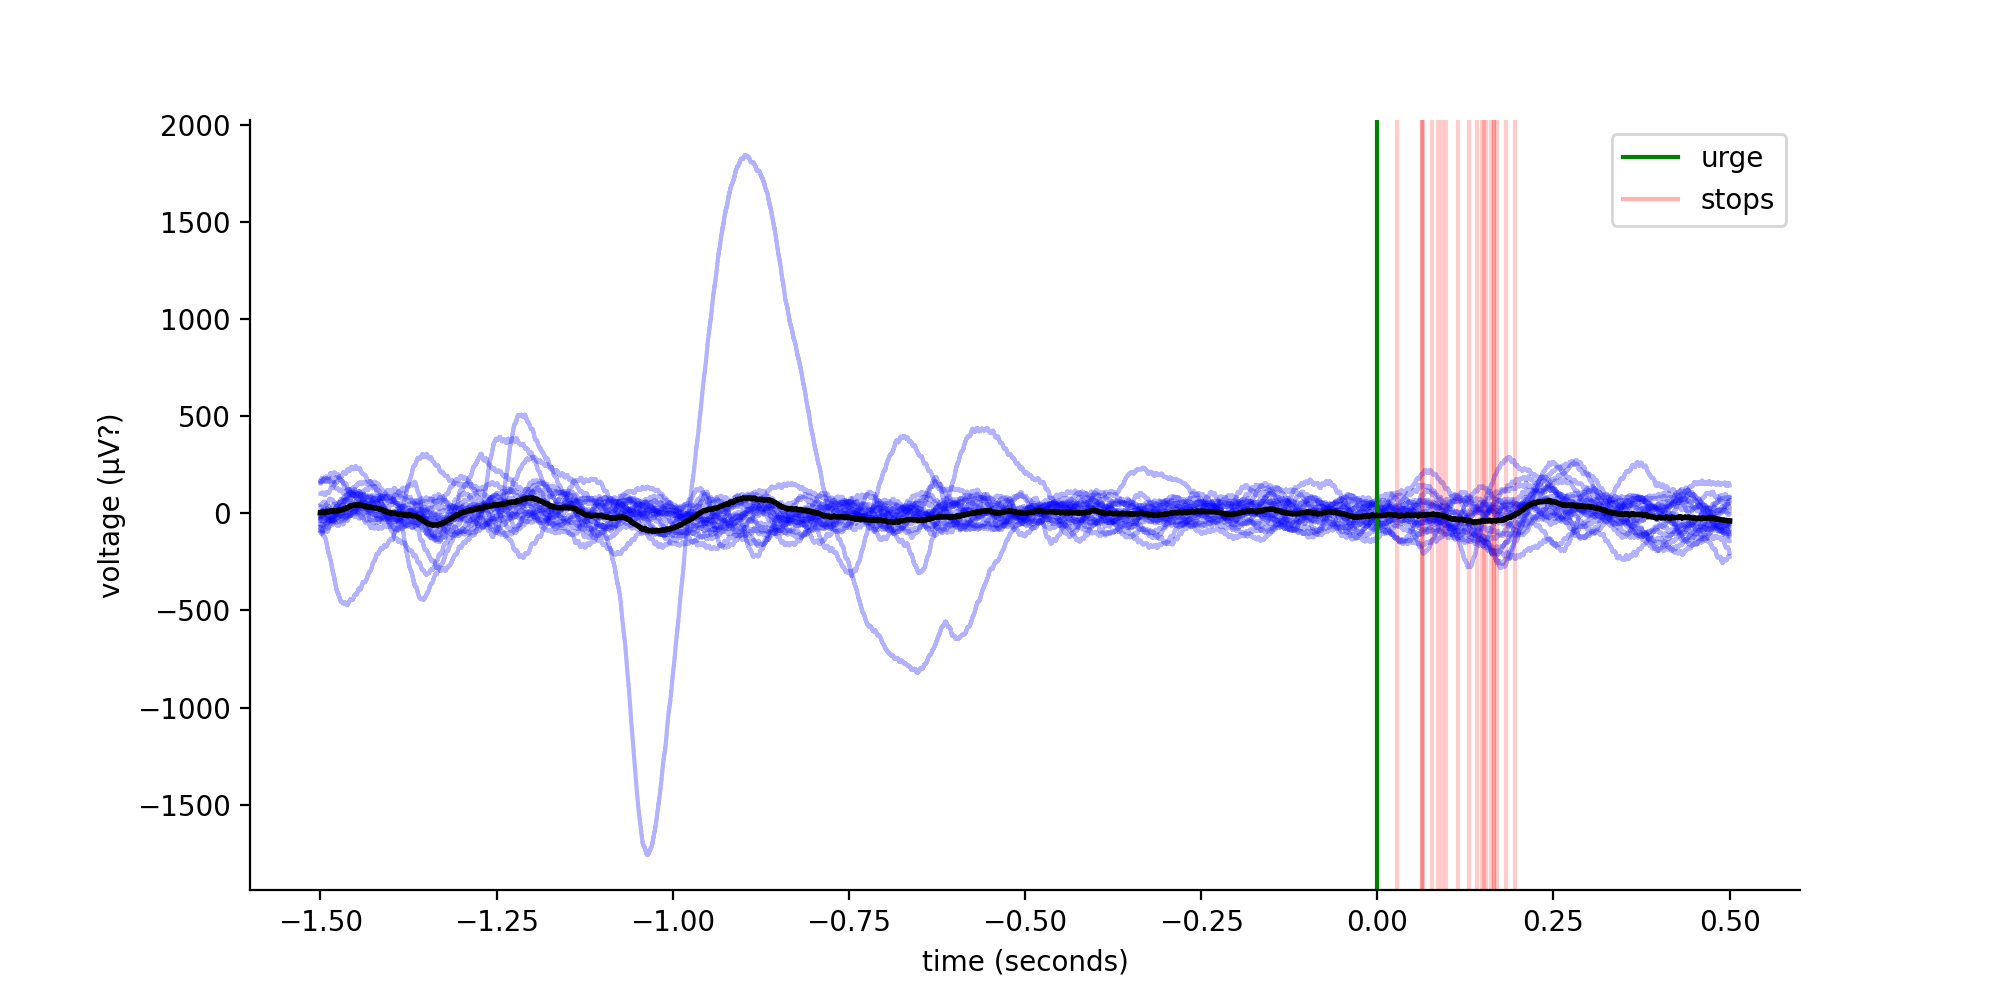

In [9]:
"Plot average of protocol 2"

fig, ax = plt.subplots(figsize=(10,5))

for i,trial in enumerate(loaded_libet['p2_wavs']):
    plt.plot(times_p2, trial, color="blue", alpha = 0.3)
    plt.axvline(times_p2[loaded_libet['p2_stop_idxs'][i]], color='r', alpha=0.2)

plt.axvline(times_p2[loaded_libet['p2_urge_idx']], color='green', label='urge')
plt.plot([], color='red', label='stops', alpha=0.3)
plt.plot(times_p2, loaded_libet['p2_mean_wav'], color="black", lw=2)

plt.xlabel("time (seconds)")
plt.ylabel("voltage (µV?)")
    
plt.legend()
sns.despine()


## interpreting your results

Now take a close look at your data to see if it holds evidence of having recorded a readiness potential.  The readiness potential can occur anywhere up to ~1.2 seconds before the stop, but the onset is typically seen around -0.6 seconds. 

The sample data we provided does *not* show a readiness potential; however, it does seem like it may show a response *after* the stop for paradigm 2 (around +0.25 s).  Perhaps this recording was made from more "motor" than "premotor" areas.  

If you did record a readiness potential, please upload your data (i.e. your pkl file) to the group repository.

If you didn't, you can try tweaking some of your experimental parameters as described on Canvas.  Note that getting a premotor EEG recording is tricky even with good equipment, so don't go crazy trying.  Those of you using cotton wick electrodes instead of conductive gel will have the best chance to collect good data.

## where to go with your figure

This is another week where the results are likely to be pretty messy.  Our goals are to have you give the experiment a shot, and analyze some data if anyone is able to record an RP.  Even if we have good data, we're again somewhat constrained on strong quantitative analysis.  The most you can really do is provide descriptive statistics -- if there's an RP evident, where does it appear relative to subjects' report of their decision to press the stop button?

Whether or not anyone gets a good RP recording, I think there is space again this week for people to spend most of their figure/legend talking more about experimental design, inderpretation, construct validity, etc.  If you want to talk about what this experiment has to contribute to discussions of free will, go wild.